In [1]:
# The dataset gives us electronics sales data at Amazon. 
# It contains user ratings for various electronics items sold, along with category of each item and time of sell.


# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset
dataset = pd.read_csv('electronics.csv')


In [2]:
# list of top ten rows
dataset.head(10)

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0
5,0,5,2.0,1999-07-12,Female,Portable Audio & Video,NaN,1999,NaN,0
6,0,6,5.0,1999-07-13,Female,Portable Audio & Video,NaN,1999,NaN,0
7,0,7,2.0,1999-07-13,Female,Portable Audio & Video,NaN,1999,NaN,0
8,0,8,4.0,1999-07-16,Female,Portable Audio & Video,NaN,1999,NaN,0
9,0,9,5.0,1999-08-20,Female,Portable Audio & Video,NaN,1999,NaN,0


In [5]:
# list of last ten rows
dataset.tail(10)

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
1292944,9304,1157624,1.0,2018-09-24,Female,Accessories & Supplies,NaN,2016,NaN,0
1292945,9320,1157625,5.0,2018-09-25,Female&Male,Computers & Accessories,ebasy,2016,NaN,0
1292946,9308,1157626,2.0,2018-09-25,Female,Computers & Accessories,NaN,2016,NaN,0
1292947,9263,111199,4.0,2018-09-25,Male,Camera & Photo,NaN,2016,NaN,2
1292948,9217,1157627,5.0,2018-09-25,Male,Headphones,NaN,2016,NaN,0
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2017,NaN,0
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,NaN,2017,NaN,0
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,NaN,2016,NaN,0
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,NaN,2018,NaN,0
1292953,9478,1157632,1.0,2018-10-01,Female,Headphones,Etre Jeune,2017,Female,0


In [7]:
# shape
dataset.shape

(1292954, 10)

In [9]:
# Let us look at the various columns we have in our dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB


In [11]:
# We can also see that the column brand is of object data type, but it is actually a string.
dataset['brand'] = dataset['brand'].astype(str)

In [13]:
# We can also see that the column Category is of object data type, but it is actually a string.
dataset['category'] = dataset['category'].astype(str)

In [15]:
# We can also see that the column User ID is of int64 data type, but it is actually a string.
dataset['user_id'] = dataset['user_id'].astype(str)

In [17]:
# We can also see that the column Product ID is of object data type, but it is actually a string.
dataset['item_id'] = dataset['item_id'].astype(str)

In [21]:
# We can also see that the column Timestamp is of object data type, but it is actually a timestamp.
from datetime import datetime
pd.to_datetime(dataset['timestamp'])

0         1999-06-13
1         1999-06-14
2         1999-06-17
3         1999-07-01
4         1999-07-06
             ...    
1292949   2018-09-26
1292950   2018-09-26
1292951   2018-09-26
1292952   2018-09-29
1292953   2018-10-01
Name: timestamp, Length: 1292954, dtype: datetime64[ns]

In [27]:
#Dropping the 'user_attr' column due to insufficient data coverage across the dataset.
dataset = dataset.drop("user_attr", axis=1)

In [29]:
#We again see the datatype of the columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  object 
 1   user_id     1292954 non-null  object 
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       1292954 non-null  object 
 7   year        1292954 non-null  int64  
 8   split       1292954 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 88.8+ MB


### Hence, finally we have a non null dataset.

In [31]:
# to get a better understanding of the dataset,
# we can also see the statistical summary of the dataset.

dataset.describe()

,rating,year,split
count,1.292954e+06,1.292954e+06,1.292954e+06
mean,4.051482e+00,2.012938e+03,1.747587e-01
std,1.379732e+00,2.643513e+00,5.506810e-01
min,1.000000e+00,1.999000e+03,0.000000e+00
25%,4.000000e+00,2.012000e+03,0.000000e+00
50%,5.000000e+00,2.014000e+03,0.000000e+00
75%,5.000000e+00,2.015000e+03,0.000000e+00
max,5.000000e+00,2.018000e+03,2.000000e+00


### **the statistical summary of the dataset gives us the following information:**

1. The mean rating is 4.05.
2. The minimum rating is 1.
3. The maximum rating is 5.
4. The standard deviation of the ratings is 1.1.
5. The 25th percentile of the ratings is 4.
6. The 50th percentile of the ratings is 5.
7. The 75th percentile of the ratings is 5.

In [34]:
# We can also see the number of unique users and items in the dataset.
dataset.nunique()

item_id          9560
user_id       1157633
rating              5
timestamp        6354
model_attr          3
category           10
brand              51
year               20
split               3
dtype: int64

In [40]:
# drop all duplicate values in rating category
dataset.rating.dropna(inplace=True)
dataset.rating.drop_duplicates(inplace=True)

In [42]:
# check for duplicates in the whole dataset
dataset.duplicated().sum()

0

In [48]:
#values counts of different columns
dataset["category"].value_counts()


category
Headphones                 359334
Computers & Accessories    322938
Camera & Photo             192573
Accessories & Supplies     158598
Portable Audio & Video     143370
Car Electronics & GPS       33070
Television & Video          32057
Home Audio                  24193
Wearable Technology         16015
Security & Surveillance     10806
Name: count, dtype: int64

In [50]:
dataset["brand"].value_counts()


brand
nan             961834
Bose             29222
Logitech         29203
Sony             20360
Mpow             17477
EldHus           16530
Sennheiser       13322
Fujifilm         12245
TaoTronics       12125
Etre Jeune       11753
Pyle             11606
JLAB             10079
Skullcandy       10014
Kodak             8701
Linksys           8288
Jabra             7417
Panasonic         7349
Fintie            7212
Garmin            7212
Samsung           7051
Canon             6959
Neewer            6697
Philips           6658
Nikon             6539
Apple             6027
Polaroid          5926
DBPOWER           4818
Uniden            4701
Olympus           3709
ViewSonic         3426
ebasy             2771
Plemo             2385
HP                2140
LSS               2040
Toshiba           2008
Savage            1749
Tiamat            1738
XShields          1709
JVC               1702
Generic           1606
Gary Fong         1203
iRULU              991
Archos             961
Funlu

In [52]:
#Years involved in the dataset
dataset["year"].value_counts()


year
2015    364004
2014    275194
2013    161695
2012    139154
2011     87695
2016     54598
2009     54333
2010     50315
2008     28520
2007     17989
2006     16336
2005     11577
2017     10429
2004      7195
2018      4624
2003      3949
2000      3572
2002       955
2001       702
1999       118
Name: count, dtype: int64

In [54]:
dataset["model_attr"].value_counts()


model_attr
Female         481171
Male           429715
Female&Male    382068
Name: count, dtype: int64

### With the help of visualization, we get to see insights related to different products involved in the dataset

#### User behavior insights

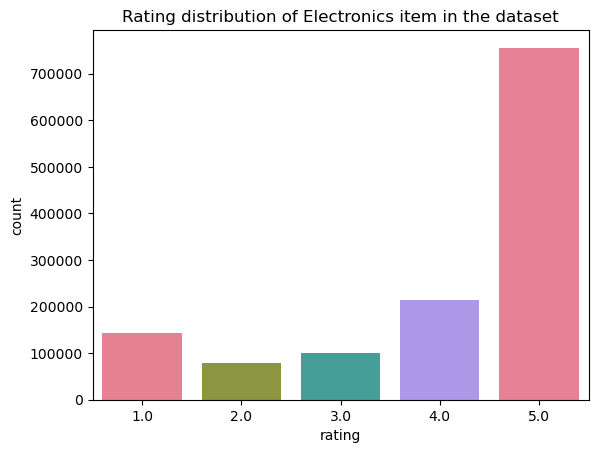

In [67]:
# the distribution of ratings 
plt.title("Rating distribution of Electronics item in the dataset")
sns.countplot(x='rating', hue='rating', data=dataset, palette='husl', legend=False)
plt.show()

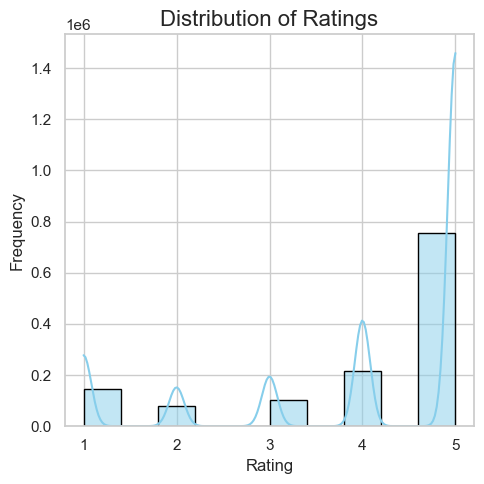

In [74]:
# Histogram or KDE plot of rating to see overall sentiment
sns.set(style="whitegrid")
plt.figure(figsize=(5, 5))
sns.histplot(dataset['rating'], kde=True, bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(range(int(dataset['rating'].min()), int(dataset['rating'].max()) + 1))

# Show plot
plt.tight_layout()
plt.show()

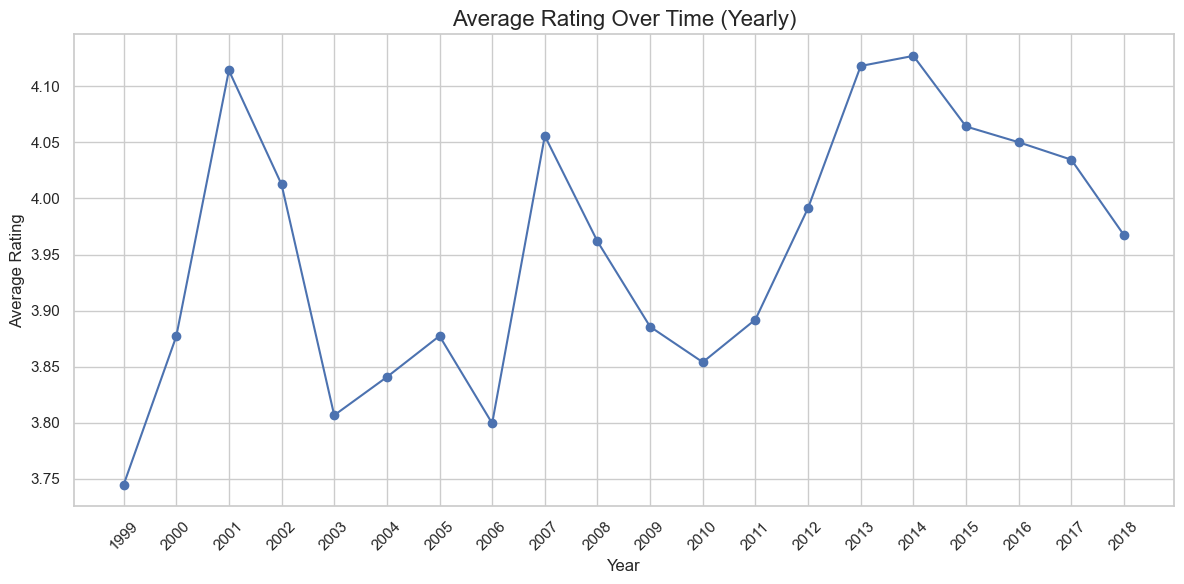

In [86]:
#Performance of rating over time

# Convert timestamp to datetime
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'], errors='coerce')

# Extract year and month for better aggregation
dataset['year_month'] = dataset['timestamp'].dt.to_period('Y')

# Calculate average rating per month
avg_rating_per_month = dataset.groupby('year')['rating'].mean().reset_index()

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(avg_rating_per_month['year'].astype(str), avg_rating_per_month['rating'], marker='o', color='b')

# Add labels and title
plt.title('Average Rating Over Time (Yearly)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

#### Product Trend

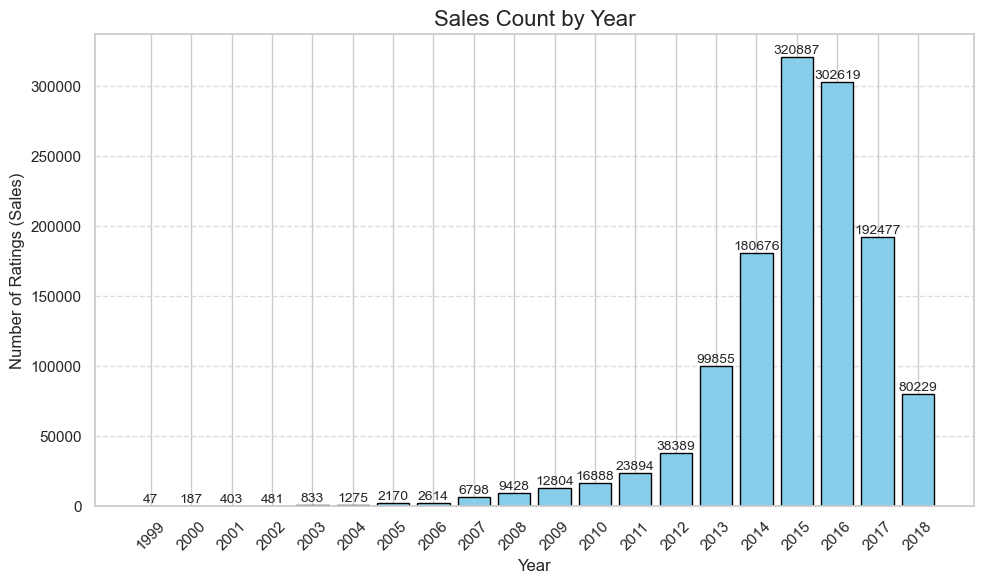

In [89]:
# what was the best year of sales
# Extract year from timestamp
dataset['year'] = pd.DatetimeIndex(dataset['timestamp']).year

# Group by year and count number of ratings (sales)
yearly_sales = dataset.groupby('year')['rating'].count().reset_index()

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(yearly_sales['year'].astype(str), yearly_sales['rating'], color='skyblue', edgecolor='black')

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 5, f'{yval}', ha='center', va='bottom', fontsize=10)

# Titles and labels
plt.title('Sales Count by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Ratings (Sales)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()
plt.show()


In [ ]:
# Hence most sales was done in year 2015. We will dive into it. 

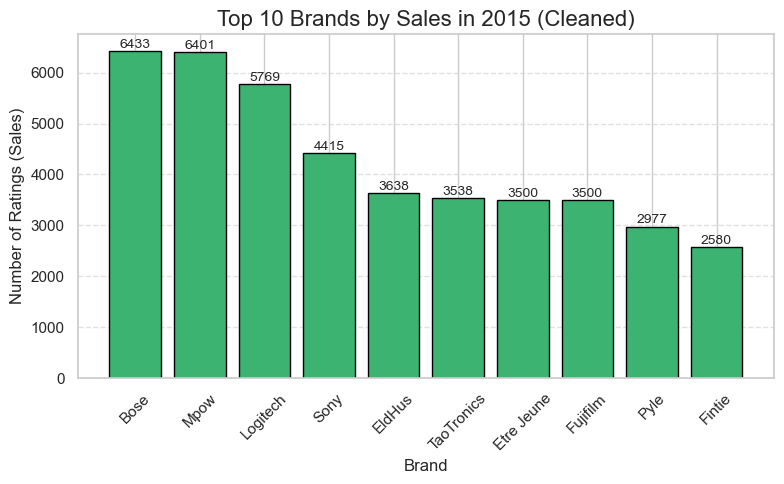

In [121]:

# Filter for 2015 and remove 'NaN'-like strings from brand column
plt.figure(figsize=(8,5))
dataset_2015 = dataset[(dataset['year'] == 2015) & (~dataset['brand'].isin(['NaN', 'nan', 'None', '', ' ']))]

# Group by brand and count ratings
top_brands_2015 = (
    dataset_2015.groupby('brand')['rating']
    .count()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Plot
bars = plt.bar(top_brands_2015['brand'], top_brands_2015['rating'], color='mediumseagreen', edgecolor='black')

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval}', ha='center', va='bottom', fontsize=10)

# Titles and labels
plt.title('Top 10 Brands by Sales in 2015 (Cleaned)', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Number of Ratings (Sales)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Layout adjustment
plt.tight_layout()
plt.show()


In [3]:
# Bose sold the most followed closely with Mpow while the least sold was Fintie in the year 2015.

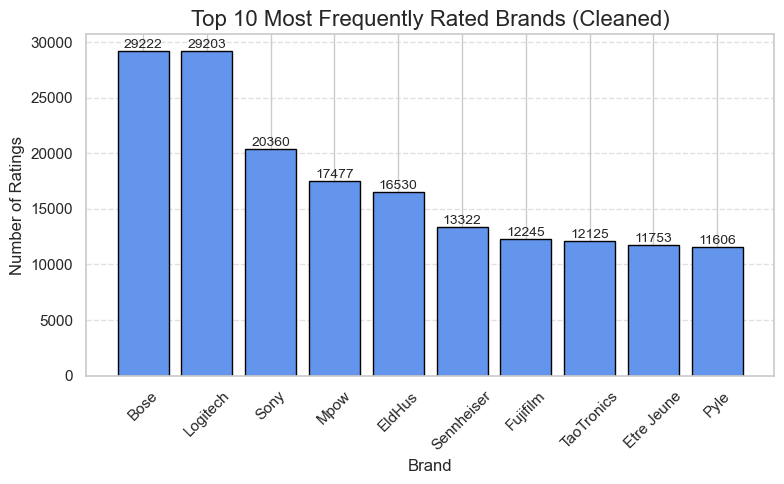

In [119]:
#Bar chart of most frequently rated brand overall
plt.figure(figsize=(8,5))
# Filter out unwanted brand entries
valid_brands = dataset[~dataset['brand'].isin(['NaN', 'nan', 'None', '', ' '])]

# Group by brand and count ratings
top_brands = (
    valid_brands.groupby('brand')['rating']
    .count()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Plot
bars = plt.bar(top_brands['brand'], top_brands['rating'], color='cornflowerblue', edgecolor='black')

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval}', ha='center', va='bottom', fontsize=10)

# Titles and labels
plt.title('Top 10 Most Frequently Rated Brands (Cleaned)', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Layout
plt.tight_layout()
plt.show()

In [99]:
# Brand Bose made the most sales while Pyle made the least sales.

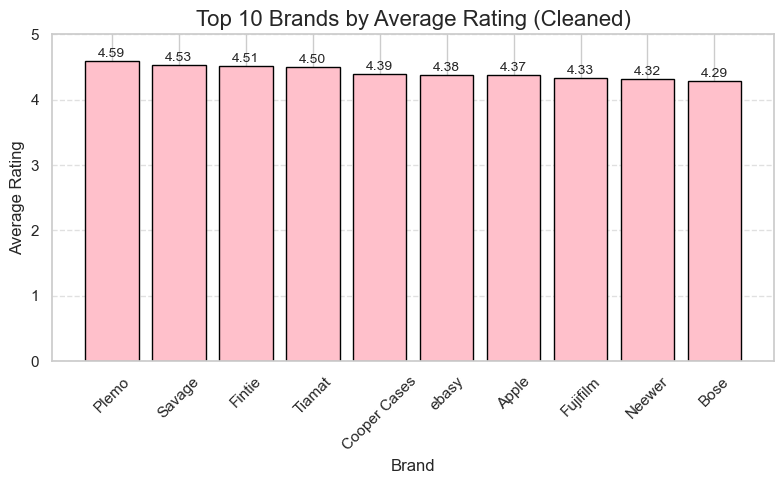

In [125]:
#Average rating per brand or item.
plt.figure(figsize=(8, 5))
valid_brands = dataset[~dataset['brand'].isin(['NaN', 'nan', 'None', '', ' '])]

# Calculate average rating per brand
avg_rating_per_brand = (
    valid_brands.groupby('brand')['rating']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Plot
bars = plt.bar(avg_rating_per_brand['brand'], avg_rating_per_brand['rating'], color='pink', edgecolor='black')

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

# Titles and labels
plt.title('Top 10 Brands by Average Rating (Cleaned)', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.ylim(0, 5)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Layout
plt.tight_layout()
plt.show()

<Figure size 500x500 with 0 Axes>

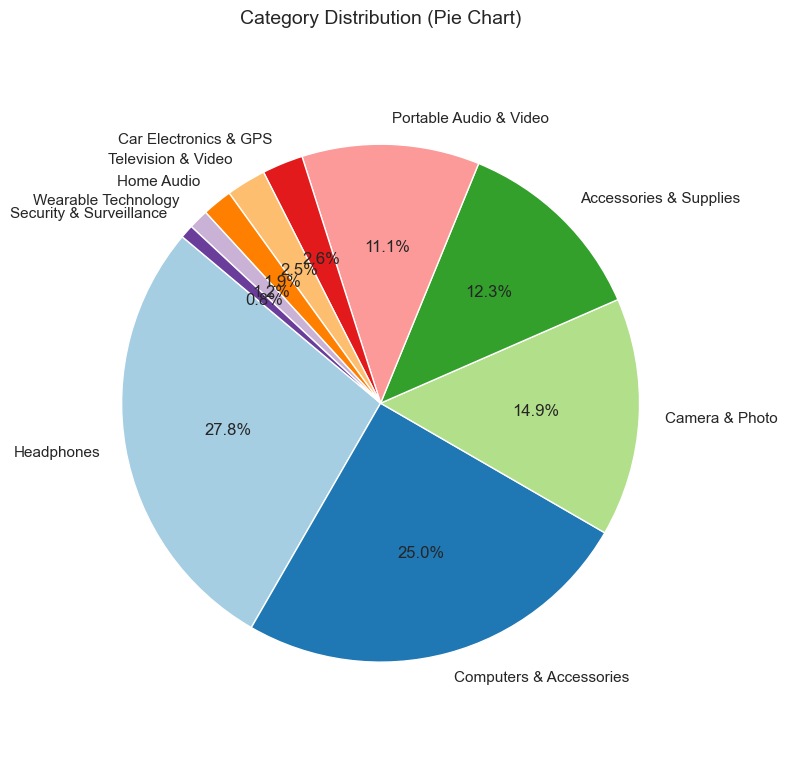

In [127]:
#pie chart of category of products
plt.figure(figsize=(5, 5))
import matplotlib.pyplot as plt

# Count category distribution
category_counts = dataset['category'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Category Distribution (Pie Chart)', fontsize=14)
plt.axis('equal')  # Makes the pie round
plt.tight_layout()
plt.show()


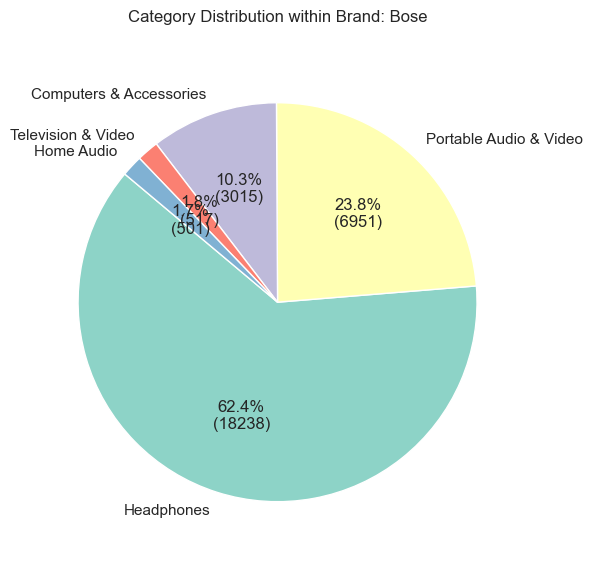

In [131]:
#As we see the brand "Bose" has done the maximum sale, we see what category of products have been sold under the brand name

# Filter dataset for brand 'Bose' (case-insensitive and cleaned)
bose_data = dataset[dataset['brand'].str.lower() == 'bose']

# Count the number of ratings per category for Bose
bose_category_counts = bose_data['category'].value_counts()

# Custom function to display both count and percentage
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({count})'
    return my_autopct

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(bose_category_counts, labels=bose_category_counts.index,
        autopct=make_autopct(bose_category_counts),
        startangle=140, colors=plt.cm.Set3.colors)

# Title and formatting
plt.title('Category Distribution within Brand: Bose', fontsize=12)
plt.axis('equal')
plt.tight_layout()
plt.show()


#### Sales review

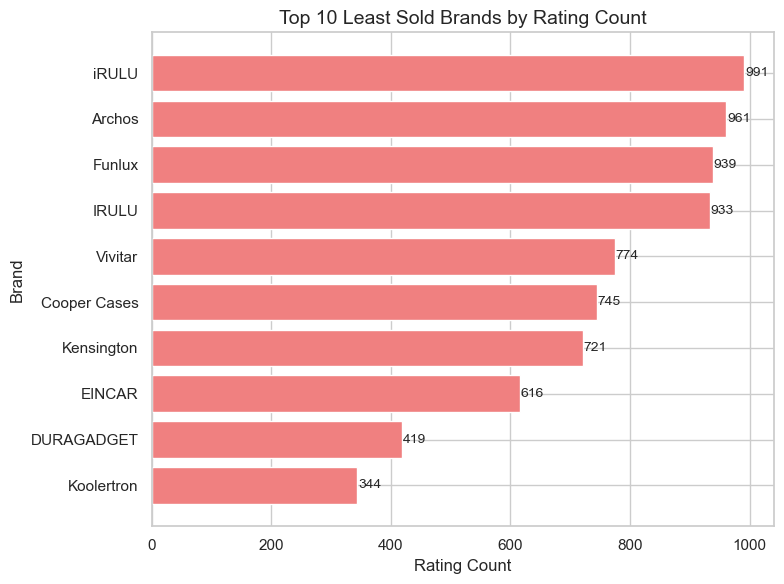

In [161]:
# Which brand made the least sale (top 10)?

# Filter out invalid brand names
valid_brand = dataset[~dataset['brand'].isin(['NaN', 'nan', 'None', '', ' '])]

# Group by brand, count the number of ratings (or frequency) for each brand
brand_rating_counts = valid_brand.groupby('brand').size().reset_index(name='rating_count')

# Sort the brands by rating count in ascending order and select the top 10 least sold
top_10_least_sold_brand = brand_rating_counts.sort_values(by='rating_count', ascending=True).head(10)

# Plot the top 10 least sold brands
plt.figure(figsize=(8, 6))
bars = plt.barh(top_10_least_sold_brand['brand'], top_10_least_sold_brand['rating_count'], color='lightcoral')

# Add label for count
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f'{bar.get_width()}', va='center', fontsize=10)

# Titles and labels
plt.title('Top 10 Least Sold Brands by Rating Count', fontsize=14)
plt.xlabel('Rating Count', fontsize=12)
plt.ylabel('Brand', fontsize=12)
plt.tight_layout()
plt.show()






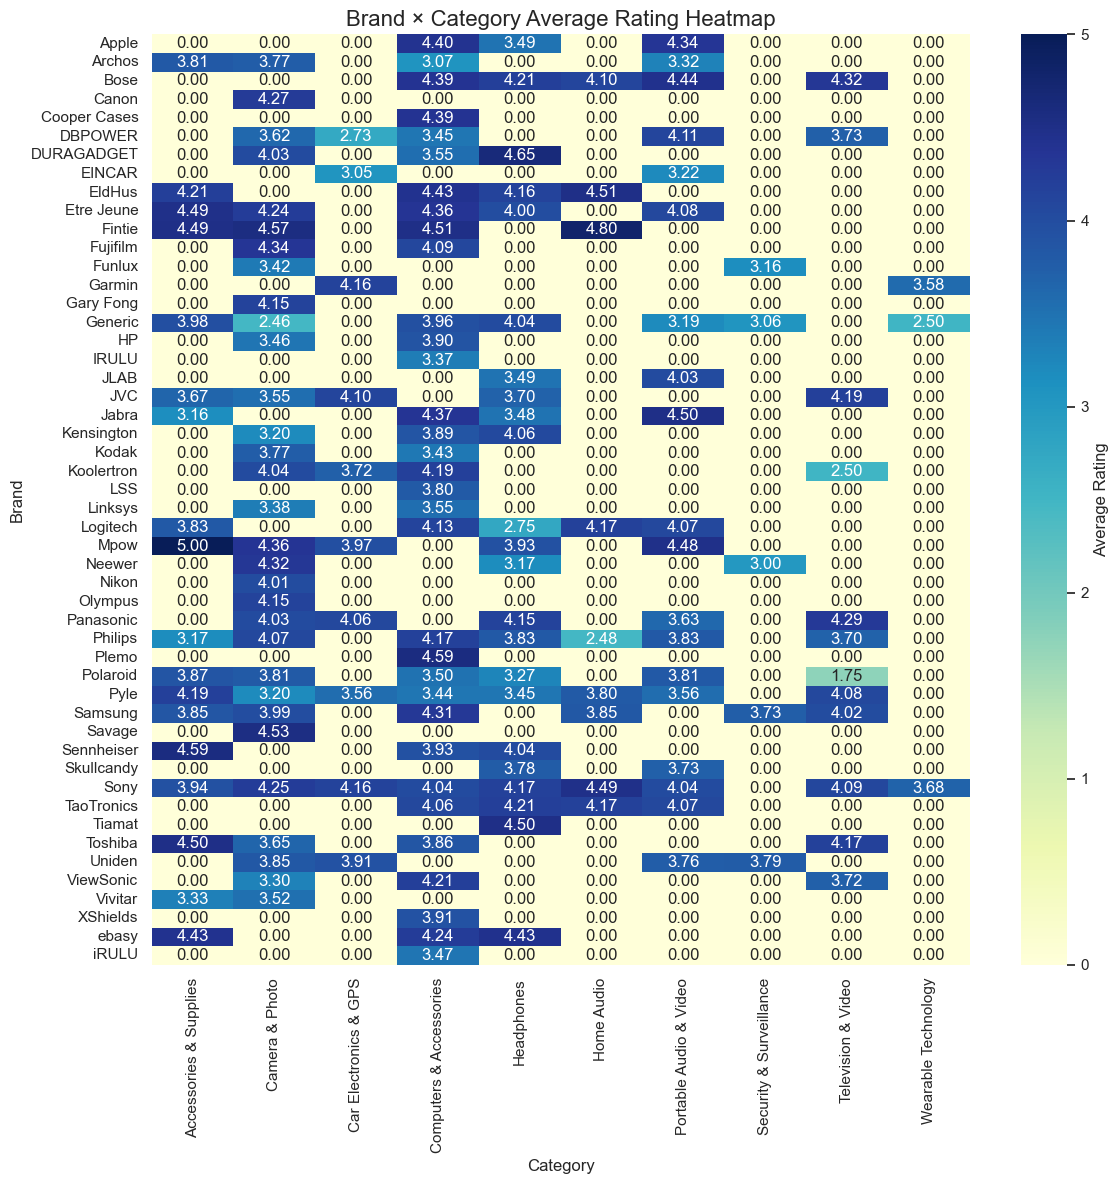

In [142]:
#Heatmap showing frequency or avg rating for each brand × category

# Pivot dataset to get a table of brand vs category average rating
brand_category_avg_rating = dataset[~dataset['brand'].isin(['NaN', 'nan', 'None', '', ' '])].pivot_table(
    index='brand', columns='category', values='rating', aggfunc='mean', fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(brand_category_avg_rating, annot=True, fmt='.2f', cmap='YlGnBu', cbar_kws={'label': 'Average Rating'})
plt.title('Brand × Category Average Rating Heatmap', fontsize=16)
plt.ylabel('Brand', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.tight_layout()
plt.show()


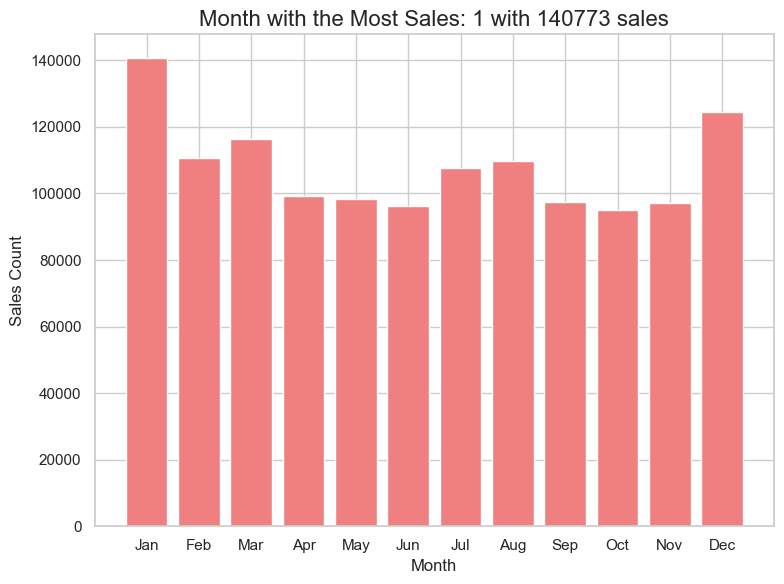

The month with the most sales is: 1 with 140773 sales.


In [163]:
# The month of January had the best sales across all the years.

import matplotlib.pyplot as plt

# Convert timestamp to datetime
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'], errors='coerce')

# Extract month from the timestamp
dataset['month'] = dataset['timestamp'].dt.month

# Group by month and count the number of ratings (or sales) for each month
monthly_sales = dataset.groupby('month').size().reset_index(name='sales_count')

# Find the month with the most sales
most_sales_month = monthly_sales.loc[monthly_sales['sales_count'].idxmax()]

# Plot the monthly sales
plt.figure(figsize=(8, 6))
plt.bar(monthly_sales['month'], monthly_sales['sales_count'], color='lightcoral')

# Add title and labels
plt.title(f'Month with the Most Sales: {most_sales_month["month"]} with {most_sales_month["sales_count"]} sales', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales Count', fontsize=12)
plt.xticks(monthly_sales['month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

# Display the result
print(f"The month with the most sales is: {most_sales_month['month']} with {most_sales_month['sales_count']} sales.")


## Insights from the dataset
0. Year 2015 had the best sales.
1. Most Sales made in January.
2. We can see that the brand name of Bose sold the most followed closely with Logitech.
3. Which the highest sold brand is Bose, it has the least average rating of 4.29 while compared with other top 10 brands.
4. Plemo being the highest averating rating brand does not come under the top 10 performing brand.
5. Category headphones sold the most followed by Compturer accessories.
6. Least sold category product is Security and Surveillance products.
7. Least sold brand is Koolertron followed by Duragadget.
